In [8]:
#https://qiskit.org/textbook/ch-states/atoms-computation.html 참고
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
qc_output = QuantumCircuit(8)

In [3]:
qc_output.measure_all()

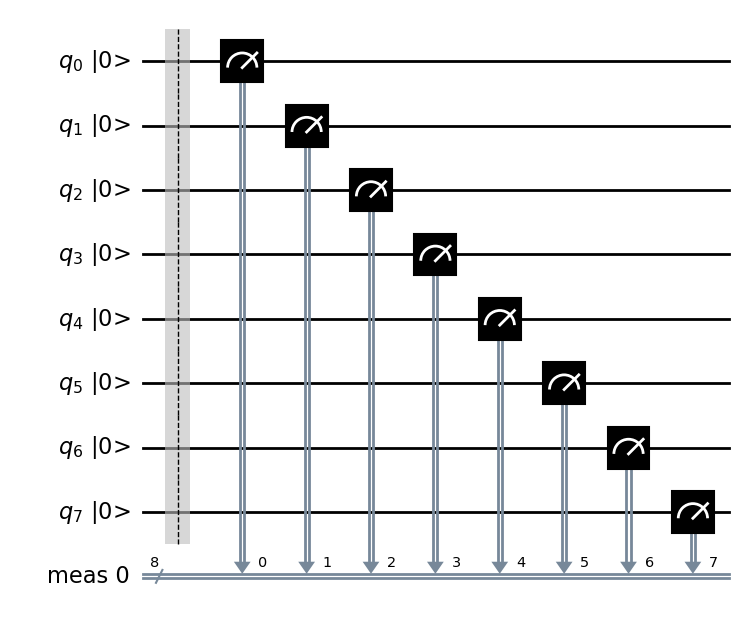

In [6]:
qc_output.draw(initial_state = True, output='mpl')

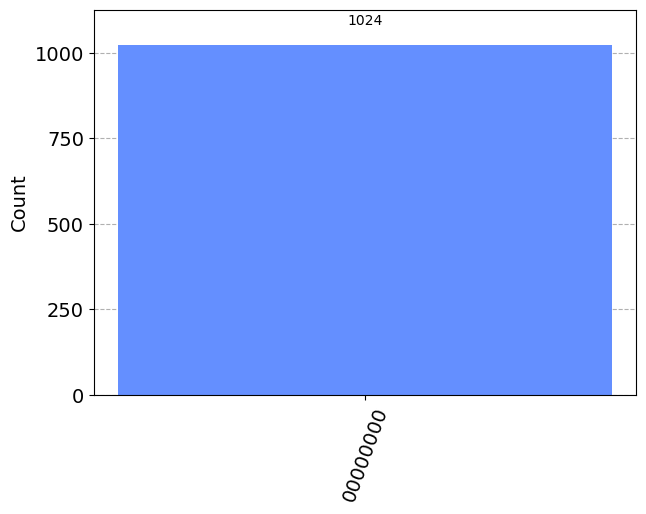

In [9]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

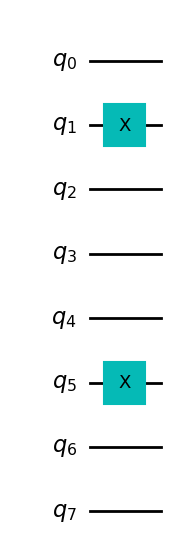

In [11]:
#qubit에 아무런 처리도 하지 않았으므로 0 state상태로 관찰됨

qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw(output='mpl')

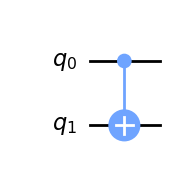

In [12]:
#quantum circuit에서 XOR의 역할 : CNOT gate가 처리함
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

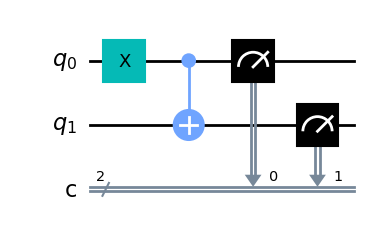

In [13]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

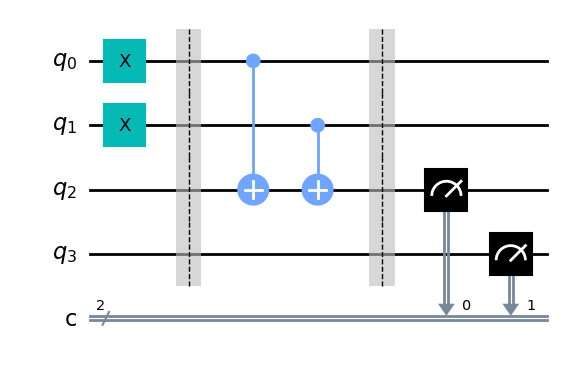

In [14]:
#위의 결과에서는 입력에 따라 첫번째 qubit의 경우 입력한 그대로, 두번째 qubit의 경우는 첫번째 qubit이 1일 때 뒤집히고 0이면 그대로 나오게 됨
#또한 입력을 덮어 씌우지 않기 위해 (qubit에 집어넣은 입력) 2개의 CNOT 게이트를 활용한 예시

qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
#control qubit : 0, target qubit :2
qc_ha.cx(0,2)
#control qubit : 0, target qubit :2
qc_ha.cx(1,2)
qc_ha.barrier()

#XOR 게이트를 나온 결과 확인하기
qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

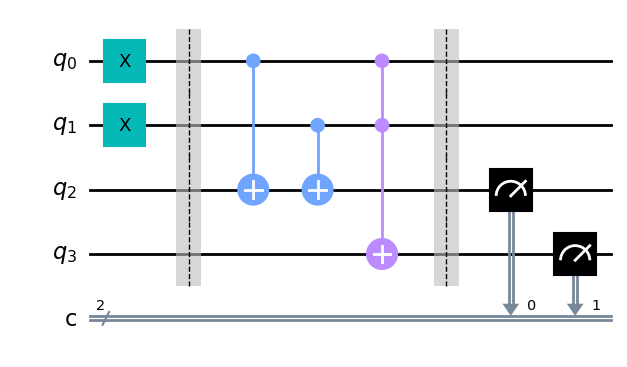

In [15]:
#Toffoli gate : control qubit 2개, target qubit 1개 control qubit모두 1state일 때 target qubit에 not gate로 작동

qc_ha = QuantumCircuit(4,2)

qc_ha.x(0) 
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0) #XOR 값 얻기
qc_ha.measure(3,1) #AND 값 얻기

qc_ha.draw(output='mpl')

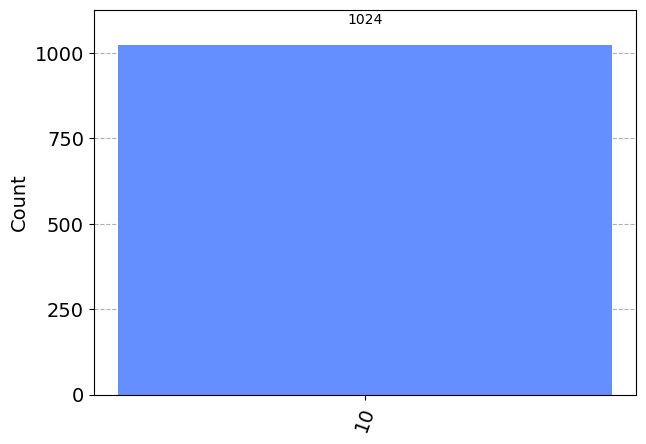

In [19]:

simulator = Aer.get_backend('aer_simulator')

counts = execute(qc_ha, backend=simulator, shots=1024).result().get_counts()
plot_histogram(counts)

In [20]:
#결과는1+1의 값인 10으로 측정 

import qiskit.tools.jupyter
%qiskit_version_table